# DL Lab Assignment - LSTM

**Course Name:** Deep Learning-MDM

**Lab Title:** LSTM Lab Assignment

**Student Name:** Rohit Jagtap

**Student ID:** 202201040048


# **Experiment 1:**

<br>**Objective:To forecast future values of a univariate time series using LSTM-based models.**<br>

**Dataset-link (Melbourne Daily Min Temp — Weather Dataset): https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv**



**Cell 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math

**Cell 2: Load and Display Dataset Info**

In [2]:
# Load Dataset (Melbourne Daily Min Temp — Weather Dataset)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Temp']]  # Using only the minimum daily temperature

# Dataset Summary
print("Dataset: Daily Minimum Temperatures – Melbourne")
print("Date Range:", df.index.min(), "to", df.index.max())
print("Total Records:", len(df))
df.head()

Dataset: Daily Minimum Temperatures – Melbourne
Date Range: 1981-01-01 00:00:00 to 1990-12-31 00:00:00
Total Records: 3650


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


**Cell 3: Normalize Data**

In [3]:
# Normalize the temperature values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

print("Data normalized using MinMaxScaler.")

Data normalized using MinMaxScaler.


**Cell 4: Create Sequences**

In [4]:
# Function to create time series sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

# Set sequence length
seq_len = 30
X, y = create_sequences(data_scaled, seq_len)

print("Sequence length used for LSTM:", seq_len)
print("Input shape:", X.shape)

Sequence length used for LSTM: 30
Input shape: (3620, 30, 1)


**Cell 5: Train/Test Split**

In [5]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train/Test split ratio: 80/20")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Train/Test split ratio: 80/20
Training samples: 2896
Testing samples: 724


**Cell 6: Define and Compile LSTM Model**

In [6]:
# Define LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print("LSTM Model Defined:")
print("LSTM units: 64")
print("Optimizer: Adam")
print("Loss function: MSE")

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Model Defined:
LSTM units: 64
Optimizer: Adam
Loss function: MSE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

**Cell 7: Train the Model**

In [7]:
# Train LSTM model
epochs = 100
batch_size = 32
print(f"Training the model for {epochs} epochs with batch size {batch_size}...")

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Training the model for 100 epochs with batch size 32...
Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0304 - val_loss: 0.0095
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - val_loss: 0.0095
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - val_loss: 0.0088
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - val_loss: 0.0084
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - val_loss: 0.0081
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - val_loss: 0.0080
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - val_loss: 0.0074
Epoch 

**Cell 8: Make Predictions**

In [8]:
# Predict using the trained model
y_pred = model.predict(X_test)
print("Prediction complete.")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Prediction complete.


**Cell 9: Evaluate Performance**

In [9]:
# Inverse scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate RMSE and MAE
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"Evaluation Metrics:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")

Evaluation Metrics:
RMSE (Root Mean Squared Error): 2.21
MAE (Mean Absolute Error): 1.74


**Cell 10: Visualize Results**

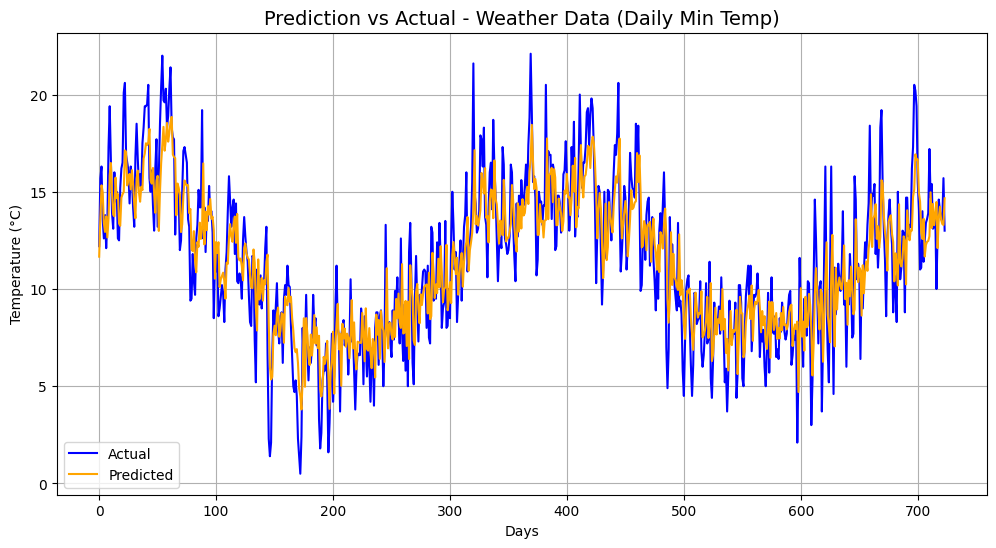

In [10]:
# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='orange')
plt.title('Prediction vs Actual - Weather Data (Daily Min Temp)', fontsize=14)
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# **Experiment 2: Sequence Text Prediction using LSTM**

<br>**Objective:To generate next characters/words based on a given input sequence using LSTM.**<br>

**Dataset: Shakespeare’s Text (TensorFlow Datasets)**

**Step 1: Install Required Libraries**

In [11]:
!pip install tensorflow

**Step 2: Load Dataset**

In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

# Load dataset without supervised mode
data, info = tfds.load("tiny_shakespeare", with_info=True)

# Read the full text
text_data = ""
for example in data['train']:
    text_data += example["text"].numpy().decode("utf-8")

print(f"Total characters in dataset: {len(text_data)}")
print(f"Sample text:\n{text_data[:500]}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.4U2N79_1.0.0/tiny_shakespeare-train.tfrecord*.…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.4U2N79_1.0.0/tiny_shakespeare-validation.tfrec…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tiny_shakespeare/incomplete.4U2N79_1.0.0/tiny_shakespeare-test.tfrecord*..…

Dataset tiny_shakespeare downloaded and prepared to /root/tensorflow_datasets/tiny_shakespeare/1.0.0. Subsequent calls will reuse this data.
Total characters in dataset: 1003854
Sample text:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


**Step 3: Text Preprocessing**

In [13]:
# Create character-level vocabulary
vocab = sorted(set(text_data))
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Vectorize text
text_as_int = np.array([char2idx[c] for c in text_data])

# Set sequence length
seq_length = 100
examples_per_epoch = len(text_data)//seq_length

# Create training sequences
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


**Step 4: Create Batches**

In [14]:
# Batch size and buffer for shuffling
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


**Step 5: Build the LSTM Model**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

vocab_size = len(vocab)  # vocab_size should be the length of your vocabulary
embedding_dim = 256  # you can adjust this value as needed
rnn_units = 1024

model = Sequential([
    Input(shape=(None,)),  # Input shape defined here
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True),
    Dense(vocab_size)
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 256)      │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 1024)     │     5,246,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, None, 65)       │        66,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,330,241 (20.33 MB)

 Trainable params: 5,330,241 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

**Step 6: Define Loss and Compile**

In [16]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)


** Step 7: Train the Model**

In [17]:
history = model.fit(dataset, epochs=10)
model.save_weights("shakespeare_model.weights.h5")  # ✅ Save weights after training


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - loss: 3.1914
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 2.1289
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - loss: 1.8315
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 1.6547
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 1.5491
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 1.4726
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - loss: 1.4160
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - loss: 1.3767
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - loss: 1.3416
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 1.3123


**Step 8: Plot Training Loss**

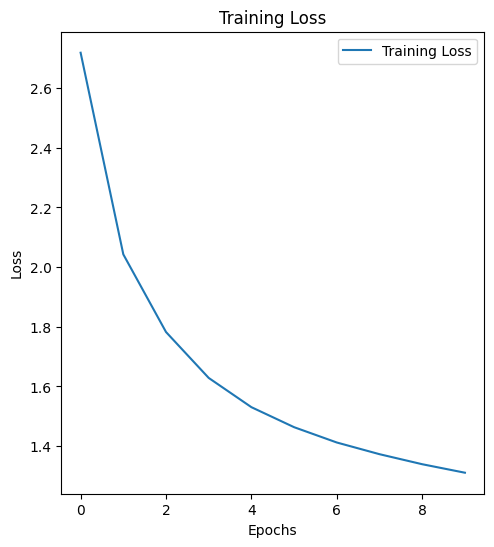

In [18]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()


**Step 9: Text Generation Function**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
import tensorflow as tf

# Build model with Input() layer that defines batch_input_shape
model = Sequential([
    Input(batch_shape=(1, None)),  # Define input shape here!
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
    Dense(vocab_size)
])

# Load weights before text generation
model.load_weights("shakespeare_model.weights.h5")  # Use saved weights

# Model is already built with Input layer
# Now you can generate text

def generate_text(model, start_string):
    num_generate = 500
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    temperature = 0.5

    # Reset the states of the LSTM layer
    model.layers[1].reset_states()  # Reset states of LSTM layer (index 1)

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Run the generation
print(generate_text(model, start_string="To be or not to be, "))


To be or not to be, be promsesh in his prisoner
To the seators of a way for a word,
That I shall be a woman's country's blood,
In the rest be bear to the man's life.

KING RICHARD III:
Why, how now, as the cousin Blood of a good
With him he would be dead: but be a cause,
So shall be so some at like to answer thee,
The other way with compassion to him.

SICINIUS:
Now, sir, sir, and my son, sir, and leave the dear beaten
As was a traitor of thy name of my son,
Where is the corn provost and will accused bear
The provo


In [21]:
print(generate_text(model, start_string="Once upon a time, "))


Once upon a time, we shall have a love to see
The princes his mother with a peace, be holy dread,
And that in the county banish'd blood;
And in the people are desperation of a traitor,
That love the true love as honour will not say.

DUCHESS OF YORK:
How now, good mad, resist they shall be so strength
And not a sweet princely gentleman,
That he may command of the world with me;
The earth hath see the second should be so.

First Musician:
Why, let me not we will make you to your pleasure to my best
All find to her


In [22]:
print(generate_text(model, start_string="In the heart of the jungle, "))


In the heart of the jungle, bring a sight were false
To himself and my part and love and great days.

KING RICHARD III:
This is the duke of worthy man that I may be gone,
And so he hath along in the other person,
That we did not move a man as death,
The wish'd son, heart it not with a loather's day.

LADY ANNE:
When I shall be the duke provoked by this prince,
And with the traitor of the country--

GLOUCESTER:
Now gone, be gone, the second well say the commons
And person the king and honour and dead
The sight shall have no


# **Experiment 3: Sequence Text Classification using LSTM**

<br>**Objective:To classify text sequences (movie reviews) as positive or negative sentiment using an LSTM model.**<br>

**Dataset-Link (IMDb dataset):  https://www.tensorflow.org/datasets/catalog/imdb_reviews**

**Step 1: Install Required Libraries**

In [23]:
!pip install seaborn

**Step 2: Import Libraries**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

**Step 3: Load IMDb Dataset**

In [25]:
# Load top 10,000 words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000


**Step 4: Preprocess - Padding Sequences**

In [26]:
# Padding to ensure equal input length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (25000, 200)
x_test shape: (25000, 200)


**Step 5: Build LSTM Model**

In [27]:
model = Sequential([
    Embedding(num_words, 100, input_length=maxlen),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Build the model before training
model.build(input_shape=(None, maxlen))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 200, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056,833 (4.03 MB)

 Trainable params: 1,056,833 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

**Step 6: Train the Model**

In [28]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.6919 - loss: 0.5467 - val_accuracy: 0.8666 - val_loss: 0.3169
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9028 - loss: 0.2541 - val_accuracy: 0.8690 - val_loss: 0.3153
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9387 - loss: 0.1747 - val_accuracy: 0.8780 - val_loss: 0.3354
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9605 - loss: 0.1164 - val_accuracy: 0.8636 - val_loss: 0.3539
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9725 - loss: 0.0807 - val_accuracy: 0.8622 - val_loss: 0.5038
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9796 - loss: 0.0636 - val_accuracy: 0.8474 - val_loss: 0.4641
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9825 - loss: 0.0560 - val_accuracy: 0.8600 - val_loss: 0.5045
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9917 - loss: 0.0275 - 

**Step 7: Evaluate the Model**

In [29]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\n📊 Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8513 - loss: 0.7145

📊 Test Accuracy: 0.8508


**Step 8: Predictions and Classification Metrics**

In [30]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

📄 Classification Report:

              precision    recall  f1-score   support

           0     0.8474    0.8557    0.8515     12500
           1     0.8543    0.8459    0.8501     12500

    accuracy                         0.8508     25000
   macro avg     0.8508    0.8508    0.8508     25000
weighted avg     0.8508    0.8508    0.8508     25000



**Step 9: Confusion Matrix Visualization**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


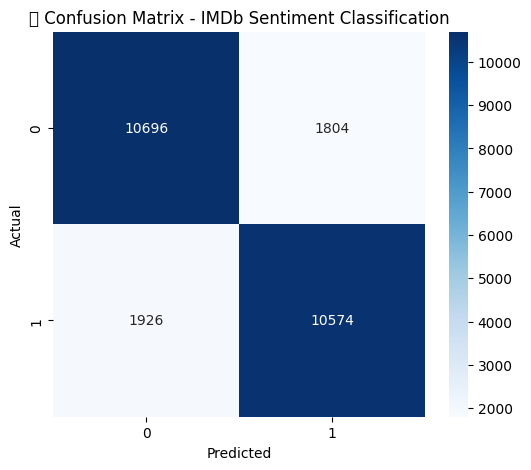

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix - IMDb Sentiment Classification")
plt.show()

# **Declaration**

I, Rohit Jagtap, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

Signature: Rohit Jagtap